# RESULTS ANALYSIS FOR INTELLIGENT SAMPLING

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ast
import statistics


In [2]:
results_q = pd.read_csv('results/data_quality_v2.csv')
results_q



,Method,Perc nodes,Perc wl,repetitions,F score / Acc,Time,F score / Acc (no profile),Seeds,Comments
0,RS,2,5,10,"[0.24906602942210077, 0.2493363537572383, 0.24...","[4.67431116104126, 4.6579225063323975, 4.66255...",NaN,"[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",NaN
1,RS,5,5,10,"[0.24914557379561236, 0.24765591416155727, 0.2...","[5.404602289199829, 5.400555610656738, 5.40752...",NaN,"[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",NaN
2,RS,10,5,10,"[0.24996322015726, 0.2476241280002035, 0.24510...","[6.5767903327941895, 6.575021028518677, 6.5727...",NaN,"[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",NaN
3,RS,25,5,10,"[0.24918696819532601, 0.24712284228997738, 0.2...","[10.16766905784607, 10.160691499710083, 10.171...",NaN,"[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",NaN
4,IS,2,5,10,"[0.6360085274968129, 0.6259876064810029, 0.621...","[8.529786348342896, 8.50368332862854, 8.540734...","[0.2201020297405843, 0.2230420822080939, 0.217...","[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",NaN
5,IS,5,5,10,"[0.6250098174747465, 0.6153110824944408, 0.610...","[9.236336708068848, 9.210454225540161, 9.25583...","[0.22353242758267114, 0.22323685488055856, 0.2...","[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",NaN
6,IS,10,5,10,"[0.6223347763473104, 0.6126650108577265, 0.607...","[10.4103262424469, 10.374091863632202, 10.4413...","[0.20669344042837703, 0.21910423405309473, 0.2...","[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",NaN
7,IS,25,5,10,"[0.6198353607532345, 0.6102543744251824, 0.605...","[13.37893557548523, 13.362829208374023, 13.404...","[0.2147170962330348, 0.2193744252673239, 0.219...","[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",Not enough nodes in all categories
8,RR,2,5,10,"[0.2505839717018786, 0.24786294385477334, 0.24...","[4.160166025161743, 4.156299829483032, 4.16728...",NaN,"[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",NaN
9,RR,5,5,10,"[0.2502715996726784, 0.24739792303365515, 0.24...","[4.787846088409424, 4.774734020233154, 4.77630...",NaN,"[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",NaN


In [3]:
for index, row in results_q.iterrows():
    try:
        acc_list = ast.literal_eval(row['F score / Acc'])
    except(ValueError):
        print(str(index))
        print(row['F score / Acc'])
    try:
        time_list = ast.literal_eval(row['Time'])
    except(ValueError):
        print(str(index))
        print(row['time'])
    try:
        acc_np_list = ast.literal_eval(row['F score / Acc (no profile)'])
    except(ValueError):
        print(str(index))
        print(row['F score / Acc (no profile)'])
    else:
        acc_np_avg = sum(acc_np_list)/len(acc_np_list)
        acc_np_std = statistics.stdev(acc_np_list)
        results_q.loc[index, 'acc_np_avg'] = acc_np_avg
        results_q.loc[index, 'acc_np_std'] = acc_np_std
    time_avg = sum(time_list)/len(time_list)
    time_std = statistics.stdev(time_list)
    acc_avg = sum(acc_list)/len(acc_list)
    acc_std = statistics.stdev(acc_list)
    results_q.loc[index,'acc_avg'] = acc_avg
    results_q.loc[index,'acc_std'] = acc_std
    results_q.loc[index,'time_avg'] = time_avg
    results_q.loc[index,'time_std'] = time_std
    test_id = [row['Perc nodes'], row['Perc wl']]
    results_q.loc[index,'test_id'] = str(test_id)
    results_q.loc[index,'workloads'] = int(100001*row['Perc wl']/100)
    results_q.loc[index,'nodes'] = int(1897*row['Perc nodes']/100)

0
nan
1
nan
2
nan
3
nan
8
nan
9
nan
10
nan
11
nan
12
nan
13
nan
14
nan
15
nan


In [4]:
results_q

,Method,Perc nodes,Perc wl,repetitions,F score / Acc,Time,F score / Acc (no profile),Seeds,Comments,acc_avg,acc_std,time_avg,time_std,test_id,workloads,nodes,acc_np_avg,acc_np_std
0,RS,2,5,10,"[0.24906602942210077, 0.2493363537572383, 0.24...","[4.67431116104126, 4.6579225063323975, 4.66255...",NaN,"[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",NaN,0.248034,0.001866,4.666523,0.007344,"[2, 5]",5000.0,37.0,NaN,NaN
1,RS,5,5,10,"[0.24914557379561236, 0.24765591416155727, 0.2...","[5.404602289199829, 5.400555610656738, 5.40752...",NaN,"[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",NaN,0.247971,0.001663,5.400156,0.005465,"[5, 5]",5000.0,94.0,NaN,NaN
2,RS,10,5,10,"[0.24996322015726, 0.2476241280002035, 0.24510...","[6.5767903327941895, 6.575021028518677, 6.5727...",NaN,"[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",NaN,0.248044,0.001865,6.574828,0.005387,"[10, 5]",5000.0,189.0,NaN,NaN
3,RS,25,5,10,"[0.24918696819532601, 0.24712284228997738, 0.2...","[10.16766905784607, 10.160691499710083, 10.171...",NaN,"[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",NaN,0.247866,0.001640,10.170997,0.005940,"[25, 5]",5000.0,474.0,NaN,NaN
4,IS,2,5,10,"[0.6360085274968129, 0.6259876064810029, 0.621...","[8.529786348342896, 8.50368332862854, 8.540734...","[0.2201020297405843, 0.2230420822080939, 0.217...","[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",NaN,0.628167,0.006331,8.533283,0.020639,"[2, 5]",5000.0,37.0,0.220944,0.002519
5,IS,5,5,10,"[0.6250098174747465, 0.6153110824944408, 0.610...","[9.236336708068848, 9.210454225540161, 9.25583...","[0.22353242758267114, 0.22323685488055856, 0.2...","[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",NaN,0.617358,0.006242,9.243217,0.022995,"[5, 5]",5000.0,94.0,0.226554,0.014663
6,IS,10,5,10,"[0.6223347763473104, 0.6126650108577265, 0.607...","[10.4103262424469, 10.374091863632202, 10.4413...","[0.20669344042837703, 0.21910423405309473, 0.2...","[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",NaN,0.614669,0.006207,10.419505,0.027491,"[10, 5]",5000.0,189.0,0.219958,0.010068
7,IS,25,5,10,"[0.6198353607532345, 0.6102543744251824, 0.605...","[13.37893557548523, 13.362829208374023, 13.404...","[0.2147170962330348, 0.2193744252673239, 0.219...","[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",Not enough nodes in all categories,0.612217,0.006177,13.391556,0.026839,"[25, 5]",5000.0,474.0,0.219844,0.006000
8,RR,2,5,10,"[0.2505839717018786, 0.24786294385477334, 0.24...","[4.160166025161743, 4.156299829483032, 4.16728...",NaN,"[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",NaN,0.248638,0.002003,4.162954,0.007272,"[2, 5]",5000.0,37.0,NaN,NaN
9,RR,5,5,10,"[0.2502715996726784, 0.24739792303365515, 0.24...","[4.787846088409424, 4.774734020233154, 4.77630...",NaN,"[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",NaN,0.248178,0.002246,4.777761,0.005569,"[5, 5]",5000.0,94.0,NaN,NaN


# PLOT - Acc 5k

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


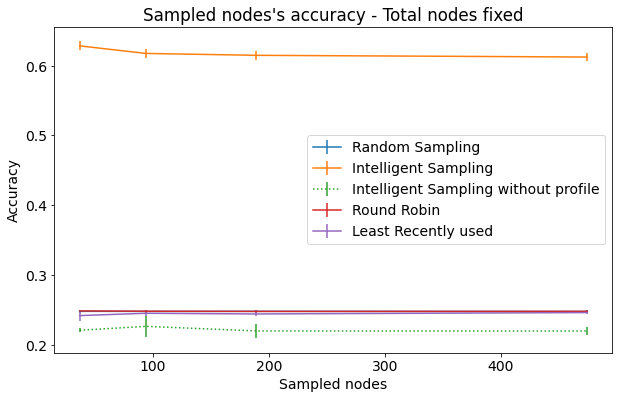

In [5]:
matplotlib.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=[10,6])

y_rs = results_q.loc[0:3, 'acc_avg'].tolist()
y_rs_err  = results_q.loc[0:3, 'acc_std'].tolist()
x = results_q.loc[0:3, 'nodes'].tolist()

y_is = results_q.loc[4:7, 'acc_avg'].tolist()
y_is_err  = results_q.loc[4:7, 'acc_std'].tolist()

y_rr = results_q.loc[8:11, 'acc_avg'].tolist()
y_rr_err  = results_q.loc[8:11, 'acc_std'].tolist()

y_lr = results_q.loc[12:15, 'acc_avg'].tolist()
y_lr_err  = results_q.loc[12:15, 'acc_std'].tolist()

y_is_np = results_q.loc[4:7, 'acc_np_avg'].tolist()
y_is_np_err  = results_q.loc[4:7, 'acc_np_std'].tolist()

plt.title('Sampled nodes\'s accuracy - Total nodes fixed')

plt.errorbar(x, y_rs, yerr=y_rs_err, label='Random Sampling')
plt.errorbar(x, y_is, yerr=y_is_err, label='Intelligent Sampling')
plt.errorbar(x, y_is_np, yerr=y_is_np_err, linestyle='dotted', label='Intelligent Sampling without profile')
plt.errorbar(x, y_rr, yerr=y_rr_err, label='Round Robin')
plt.errorbar(x, y_lr, yerr=y_lr_err, label='Least Recently used')

plt.xlabel('Sampled nodes')
plt.ylabel('Accuracy')

plt.legend(loc='best')

plt.savefig(fname='results/acc_5k_v2.eps', format='eps')
plt.savefig(fname='results/acc_5k_v2.png', format='png')


# PLOT - Acc 10k

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


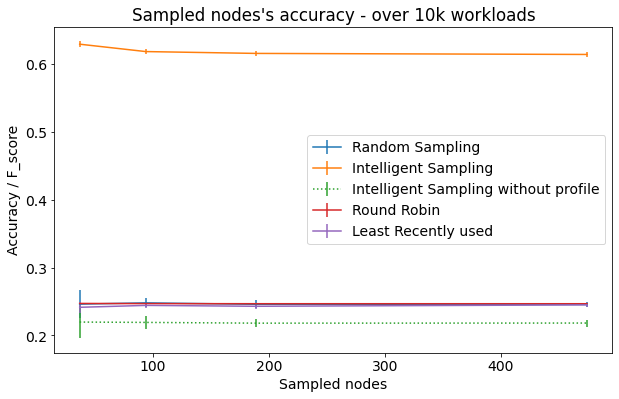

In [24]:
fig = plt.figure(figsize=[10,6])

y_rs = results_q.loc[4:7, 'acc_avg'].tolist()
y_rs_err  = results_q.loc[4:7, 'acc_std'].tolist()
x = results_q.loc[4:7, 'nodes'].tolist()

y_is = results_q.loc[12:15, 'acc_avg'].tolist()
y_is_err  = results_q.loc[12:15, 'acc_std'].tolist()

y_rr = results_q.loc[20:23, 'acc_avg'].tolist()
y_rr_err  = results_q.loc[20:23, 'acc_std'].tolist()

y_lr = results_q.loc[28:31, 'acc_avg'].tolist()
y_lr_err  = results_q.loc[28:31, 'acc_std'].tolist()

y_is_np = results_q.loc[12:15, 'acc_np_avg'].tolist()
y_is_np_err  = results_q.loc[12:15, 'acc_np_std'].tolist()

plt.title('Sampled nodes\'s accuracy - over 10k workloads')

plt.errorbar(x, y_rs, yerr=y_rs_err, label='Random Sampling')
plt.errorbar(x, y_is, yerr=y_is_err, label='Intelligent Sampling')
plt.errorbar(x, y_is_np, yerr=y_is_np_err, linestyle='dotted', label='Intelligent Sampling without profile')
plt.errorbar(x, y_rr, yerr=y_rr_err, label='Round Robin')
plt.errorbar(x, y_lr, yerr=y_lr_err, label='Least Recently used')

plt.xlabel('Sampled nodes')
plt.ylabel('Accuracy / F_score')

plt.legend(loc='center right')

plt.savefig(fname='results/acc_10k.eps_v2', format='eps')

# PLOT - Time 5K

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


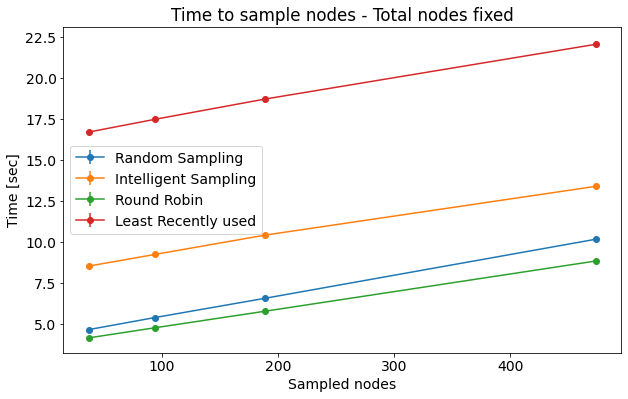

In [6]:
fig = plt.figure(figsize=[10,6])

y_rs = results_q.loc[0:3, 'time_avg'].tolist()
y_rs_err  = results_q.loc[0:3, 'time_std'].tolist()
x = results_q.loc[0:3, 'nodes'].tolist()

y_is = results_q.loc[4:7, 'time_avg'].tolist()
y_is_err  = results_q.loc[4:7, 'time_std'].tolist()

y_rr = results_q.loc[8:11, 'time_avg'].tolist()
y_rr_err  = results_q.loc[8:11, 'time_std'].tolist()

y_lr = results_q.loc[12:15, 'time_avg'].tolist()
y_lr_err  = results_q.loc[12:15, 'time_std'].tolist()

plt.title('Time to sample nodes - Total nodes fixed')

plt.errorbar(x, y_rs, yerr=y_rs_err, marker="o", label='Random Sampling')
plt.errorbar(x, y_is, yerr=y_is_err, marker="o", label='Intelligent Sampling')
plt.errorbar(x, y_rr, yerr=y_rr_err, marker="o", label='Round Robin')
plt.errorbar(x, y_lr, yerr=y_lr_err, marker="o", label='Least Recently used')

plt.xlabel('Sampled nodes')
plt.ylabel('Time [sec]')

plt.legend(loc='best')

plt.savefig(fname='results/time_5k_v2.eps', format='eps')
plt.savefig(fname='results/time_5k_v2.png', format='png')


# PLOT - Time 10K

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


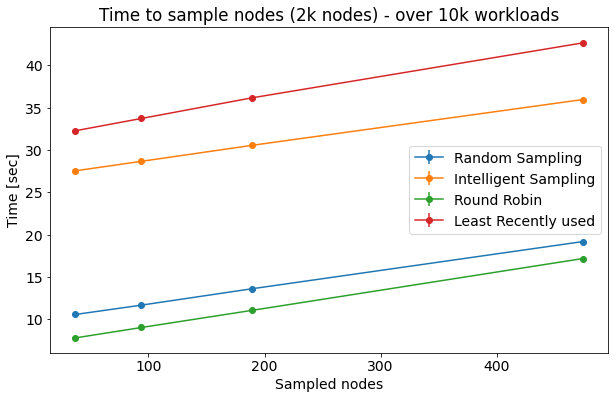

In [26]:
fig = plt.figure(figsize=[10,6])

y_rs = results_q.loc[4:7, 'time_avg'].tolist()
y_rs_err  = results_q.loc[4:7, 'time_std'].tolist()
x = results_q.loc[4:7, 'nodes'].tolist()

y_is = results_q.loc[12:15, 'time_avg'].tolist()
y_is_err  = results_q.loc[12:15, 'time_std'].tolist()

y_rr = results_q.loc[20:23, 'time_avg'].tolist()
y_rr_err  = results_q.loc[20:23, 'time_std'].tolist()

y_lr = results_q.loc[28:31, 'time_avg'].tolist()
y_lr_err  = results_q.loc[28:31, 'time_std'].tolist()

plt.title('Time to sample nodes (2k nodes) - over 10k workloads')

plt.errorbar(x, y_rs, yerr=y_rs_err, marker="o", label='Random Sampling')
plt.errorbar(x, y_is, yerr=y_is_err, marker="o", label='Intelligent Sampling')
plt.errorbar(x, y_rr, yerr=y_rr_err, marker="o", label='Round Robin')
plt.errorbar(x, y_lr, yerr=y_lr_err, marker="o", label='Least Recently used')

plt.xlabel('Sampled nodes')
plt.ylabel('Time [sec]')

plt.legend(loc='center right')

plt.savefig(fname='results/time_10k_v2.eps', format='eps')

# Large scale

In [7]:
results_s = pd.read_csv('results/data_scale_v2.csv')
results_s

,Method,Perc nodes,Perc wl,repetitions,F score / Acc,Time,F score / Acc (no profile),Seeds,Comments
0,IS,2,5,10,"[0.6188329904242519, 0.6092793689970161, 0.604...","[56.91042494773865, 56.918254375457764, 56.953...","[0.22090322280159158, 0.22207079213649253, 0.2...","[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",Nodes: 189700
1,IS,5,5,10,"[0.6187358898550646, 0.6091865708381567, 0.604...","[129.26529145240784, 129.30780124664307, 129.2...","[0.22321179287524198, 0.22235655536278792, 0.2...","[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",NaN
2,IS,10,5,10,"[0.618703887257685, 0.6091557500550157, 0.6040...","[255.8065357208252, 255.58272242546082, 256.59...","[0.22287822878228505, 0.22226821346554465, 0.2...","[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",NaN
3,IS,25,5,10,"[0.6186757190382944, 0.6091284795370457, 0.603...","[602.571935415268, 602.5320341587067, 603.0621...","[0.2226582407648506, 0.22185213557204717, 0.21...",NaN,NaN
4,RS,2,5,10,"[0.24960068450168688, 0.24734804630931498, 0.2...","[52.39273285865784, 52.56988167762756, 52.4251...",NaN,NaN,NaN
5,RS,5,5,10,"[0.24960469162889057, 0.24715557766271246, 0.2...","[129.8235845565796, 129.75443696975708, 129.59...",NaN,NaN,NaN
6,RS,10,5,10,"[0.24960469162889057, 0.24715557766271246, 0.2...","[212.07005739212036, 212.4033498764038, 211.39...",NaN,NaN,NaN
7,RS,25,5,10,"[0.24957235622137633, 0.24718177583856246, 0.2...","[540.8754389286041, 541.7335269451141, 542.904...",NaN,NaN,NaN
8,RR,2,5,10,"[0.24960368852721626, 0.2471956883085639, 0.24...","[40.66779565811157, 39.79980230331421, 39.7735...",NaN,NaN,NaN
9,RR,5,5,10,"[0.24961324545613156, 0.24716927880330017, 0.2...","[98.07437086105347, 96.70482468605042, 96.4729...",NaN,NaN,NaN


In [8]:
for index, row in results_s.iterrows():
    try:
        acc_list = ast.literal_eval(row['F score / Acc'])
    except(ValueError):
        print(str(index))
        print(row['F score / Acc'])
    try:
        time_list = ast.literal_eval(row['Time'])
    except(ValueError):
        print(str(index))
        print(row['time'])
    try:
        acc_np_list = ast.literal_eval(row['F score / Acc (no profile)'])
    except(ValueError):
        print(str(index))
        print(row['F score / Acc (no profile)'])
    else:
        acc_np_avg = sum(acc_np_list)/len(acc_np_list)
        acc_np_std = statistics.stdev(acc_np_list)
        results_s.loc[index, 'acc_np_avg'] = acc_np_avg
        results_s.loc[index, 'acc_np_std'] = acc_np_std
    time_avg = sum(time_list)/len(time_list)
    time_std = statistics.stdev(time_list)
    acc_avg = sum(acc_list)/len(acc_list)
    acc_std = statistics.stdev(acc_list)
    results_s.loc[index,'acc_avg'] = acc_avg
    results_s.loc[index,'acc_std'] = acc_std
    results_s.loc[index,'time_avg'] = time_avg
    results_s.loc[index,'time_std'] = time_std
    test_id = [row['Perc nodes'], row['Perc wl']]
    results_s.loc[index,'test_id'] = str(test_id)
    results_s.loc[index,'workloads'] = int(100001*row['Perc wl']/100)
    results_s.loc[index,'nodes'] = int(189700*row['Perc nodes']/100)

4
nan
5
nan
6
nan
7
nan
8
nan
9
nan
10
nan
11
nan
12
nan
13
nan
14
nan
15
nan


In [9]:
results_s

,Method,Perc nodes,Perc wl,repetitions,F score / Acc,Time,F score / Acc (no profile),Seeds,Comments,acc_np_avg,acc_np_std,acc_avg,acc_std,time_avg,time_std,test_id,workloads,nodes
0,IS,2,5,10,"[0.6188329904242519, 0.6092793689970161, 0.604...","[56.91042494773865, 56.918254375457764, 56.953...","[0.22090322280159158, 0.22207079213649253, 0.2...","[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",Nodes: 189700,0.220369,0.002392,0.611227,0.006171,56.958108,0.034801,"[2, 5]",5000.0,3794.0
1,IS,5,5,10,"[0.6187358898550646, 0.6091865708381567, 0.604...","[129.26529145240784, 129.30780124664307, 129.2...","[0.22321179287524198, 0.22235655536278792, 0.2...","[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",NaN,0.220348,0.002934,0.611131,0.006170,129.387458,0.124881,"[5, 5]",5000.0,9485.0
2,IS,10,5,10,"[0.618703887257685, 0.6091557500550157, 0.6040...","[255.8065357208252, 255.58272242546082, 256.59...","[0.22287822878228505, 0.22226821346554465, 0.2...","[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",NaN,0.220594,0.002849,0.611099,0.006170,255.089060,0.885854,"[10, 5]",5000.0,18970.0
3,IS,25,5,10,"[0.6186757190382944, 0.6091284795370457, 0.603...","[602.571935415268, 602.5320341587067, 603.0621...","[0.2226582407648506, 0.22185213557204717, 0.21...",NaN,NaN,0.220495,0.002652,0.611071,0.006169,603.573816,0.702761,"[25, 5]",5000.0,47425.0
4,RS,2,5,10,"[0.24960068450168688, 0.24734804630931498, 0.2...","[52.39273285865784, 52.56988167762756, 52.4251...",NaN,NaN,NaN,NaN,NaN,0.247976,0.001786,52.462127,0.081683,"[2, 5]",5000.0,3794.0
5,RS,5,5,10,"[0.24960469162889057, 0.24715557766271246, 0.2...","[129.8235845565796, 129.75443696975708, 129.59...",NaN,NaN,NaN,NaN,NaN,0.247981,0.001745,129.261321,0.535395,"[5, 5]",5000.0,9485.0
6,RS,10,5,10,"[0.24960469162889057, 0.24715557766271246, 0.2...","[212.07005739212036, 212.4033498764038, 211.39...",NaN,NaN,NaN,NaN,NaN,0.247981,0.001745,211.349760,0.518800,"[10, 5]",5000.0,18970.0
7,RS,25,5,10,"[0.24957235622137633, 0.24718177583856246, 0.2...","[540.8754389286041, 541.7335269451141, 542.904...",NaN,NaN,NaN,NaN,NaN,0.247950,0.001780,542.071708,1.131103,"[25, 5]",5000.0,47425.0
8,RR,2,5,10,"[0.24960368852721626, 0.2471956883085639, 0.24...","[40.66779565811157, 39.79980230331421, 39.7735...",NaN,NaN,NaN,NaN,NaN,0.247951,0.001792,39.937487,0.266148,"[2, 5]",5000.0,3794.0
9,RR,5,5,10,"[0.24961324545613156, 0.24716927880330017, 0.2...","[98.07437086105347, 96.70482468605042, 96.4729...",NaN,NaN,NaN,NaN,NaN,0.247964,0.001757,97.316055,0.575553,"[5, 5]",5000.0,9485.0


# PLOT Acc 5k

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


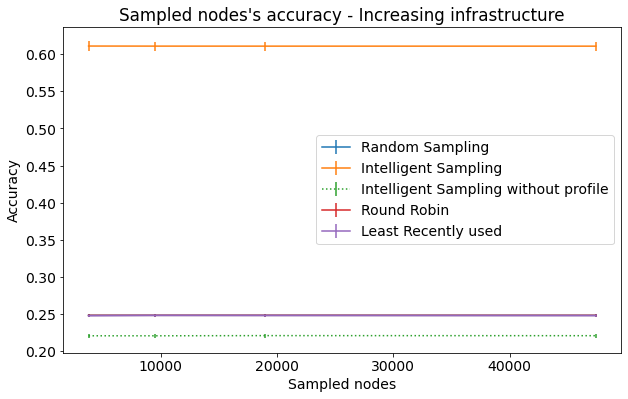

In [10]:
fig = plt.figure(figsize=[10,6])

y_is = results_s.loc[0:3, 'acc_avg'].tolist()
y_is_err  = results_s.loc[0:3, 'acc_std'].tolist()
x = results_s.loc[0:3, 'nodes'].tolist()

y_rs = results_s.loc[4:7, 'acc_avg'].tolist()
y_rs_err  = results_s.loc[4:7, 'acc_std'].tolist()

y_rr = results_s.loc[8:11, 'acc_avg'].tolist()
y_rr_err  = results_s.loc[8:11, 'acc_std'].tolist()

y_lr = results_s.loc[12:15, 'acc_avg'].tolist()
y_lr_err  = results_s.loc[12:15, 'acc_std'].tolist()

y_is_np = results_s.loc[0:3, 'acc_np_avg'].tolist()
y_is_np_err  = results_s.loc[0:3, 'acc_np_std'].tolist()

plt.title('Sampled nodes\'s accuracy - Increasing infrastructure')

plt.errorbar(x, y_rs, yerr=y_rs_err, label='Random Sampling')
plt.errorbar(x, y_is, yerr=y_is_err, label='Intelligent Sampling')
plt.errorbar(x, y_is_np, yerr=y_is_np_err, linestyle='dotted', label='Intelligent Sampling without profile')
plt.errorbar(x, y_rr, yerr=y_rr_err, label='Round Robin')
plt.errorbar(x, y_lr, yerr=y_lr_err, label='Least Recently used')

plt.xlabel('Sampled nodes')
plt.ylabel('Accuracy')

plt.legend(loc='best')

plt.savefig(fname='results/acc_5_ls_v2.eps', format='eps')
plt.savefig(fname='results/acc_5_ls_v2.png', format='png')

# PLOT Time 5K

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


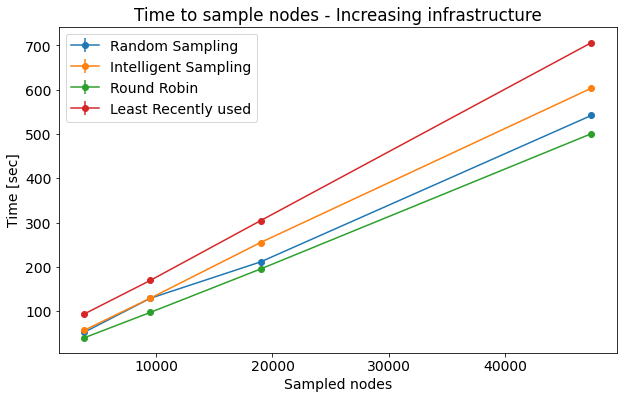

In [11]:
fig = plt.figure(figsize=[10,6])

y_is = results_s.loc[0:3, 'time_avg'].tolist()
y_is_err  = results_s.loc[0:3, 'time_std'].tolist()
x = results_s.loc[0:3, 'nodes'].tolist()

y_rs = results_s.loc[4:7, 'time_avg'].tolist()
y_rs_err  = results_s.loc[4:7, 'time_std'].tolist()

y_rr = results_s.loc[8:11, 'time_avg'].tolist()
y_rr_err  = results_s.loc[8:11, 'time_std'].tolist()

y_lr = results_s.loc[12:15, 'time_avg'].tolist()
y_lr_err  = results_s.loc[12:15, 'time_std'].tolist()

# y_is_np = results_q.loc[0:3, 'time_np_avg'].tolist()
# y_is_np_err  = results_q.loc[0:3, 'acc_np_std'].tolist()

plt.title('Time to sample nodes - Increasing infrastructure')

plt.errorbar(x, y_rs, yerr=y_rs_err, marker="o", label='Random Sampling')
plt.errorbar(x, y_is, yerr=y_is_err, marker="o", label='Intelligent Sampling')
# plt.errorbar(x, y_is_np, yerr=y_is_np_err, linestyle='dotted', label='Intelligent Sampling without profile')
plt.errorbar(x, y_rr, yerr=y_rr_err, marker="o", label='Round Robin')
plt.errorbar(x, y_lr, yerr=y_lr_err, marker="o", label='Least Recently used')

plt.xlabel('Sampled nodes')
plt.ylabel('Time [sec]')

plt.legend(loc='best')

plt.savefig(fname='results/time_5_ls_v2.eps', format='eps')
plt.savefig(fname='results/time_5_ls_v2.png', format='png')

# Infra Scale

In [12]:
results_i = pd.read_csv('results/data_infra_scale_v2.csv')
results_i

,Method,nodes,Perc wl,repetitions,F score / Acc,Time,F score / Acc (no profile),Seeds,total nodes,Increase percentage
0,IS,100,5,10,"[0.6249272801639582, 0.6151600141292101, 0.610...","[9.289647579193115, 9.235388994216919, 9.29357...","[0.2203132530120477, 0.22269079464988187, 0.22...","[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",1897,1.000000
1,IS,100,5,10,"[0.6249272801639582, 0.6151600141292101, 0.610...","[9.32150650024414, 9.26952338218689, 9.3404204...","[0.21930120481927645, 0.22302911093627031, 0.2...",NaN,9486,5.000527
2,IS,100,5,10,"[0.6249272801639582, 0.6151600141292101, 0.610...","[9.335577726364136, 9.311767339706421, 9.36089...","[0.222008032128514, 0.22153422501966905, 0.219...",NaN,37940,20.000000
3,IS,100,5,10,"[0.6249272801639582, 0.6151600141292101, 0.610...","[9.323344707489014, 9.283767461776733, 9.34047...","[0.22181526104417626, 0.22166011014948825, 0.2...",NaN,113820,60.000000
4,IS,100,5,10,"[0.6249272801639582, 0.6151600141292101, 0.610...","[9.336405515670776, 9.331003665924072, 9.35742...","[0.2216706827309231, 0.22251770259638085, 0.22...",NaN,189700,100.000000
5,RS,100,5,10,"[0.24876575315063207, 0.24802760552110625, 0.2...","[5.417107105255127, 5.418644428253174, 5.41071...",NaN,NaN,1897,1.000000
6,RS,100,5,10,"[0.24943188637727784, 0.24738347669534103, 0.2...","[5.46636176109314, 5.475117206573486, 5.455877...",NaN,NaN,9486,5.000527
7,RS,100,5,10,"[0.2498939787957613, 0.24795559111822588, 0.24...","[5.511715412139893, 5.479487657546997, 5.50247...",NaN,NaN,37940,20.000000
8,RS,100,5,10,"[0.24954990998199914, 0.24760152030406257, 0.2...","[5.476492881774902, 5.455702781677246, 5.47024...",NaN,NaN,113820,60.000000
9,RS,100,5,10,"[0.24845569113822977, 0.24838967793558944, 0.2...","[5.513719081878662, 5.493945360183716, 5.49582...",NaN,NaN,189700,100.000000


In [13]:
for index, row in results_i.iterrows():
    try:
        acc_list = ast.literal_eval(row['F score / Acc'])
    except(ValueError):
        print(str(index))
        print(row['F score / Acc'])
    try:
        time_list = ast.literal_eval(row['Time'])
    except(ValueError):
        print(str(index))
        print(row['time'])
    try:
        acc_np_list = ast.literal_eval(row['F score / Acc (no profile)'])
    except(ValueError):
        print(str(index))
        print(row['F score / Acc (no profile)'])
    else:
        acc_np_avg = sum(acc_np_list)/len(acc_np_list)
        acc_np_std = statistics.stdev(acc_np_list)
        results_s.loc[index, 'acc_np_avg'] = acc_np_avg
        results_s.loc[index, 'acc_np_std'] = acc_np_std
    time_avg = sum(time_list)/len(time_list)
    time_std = statistics.stdev(time_list)
    acc_avg = sum(acc_list)/len(acc_list)
    acc_std = statistics.stdev(acc_list)
    results_i.loc[index,'acc_avg'] = acc_avg
    results_i.loc[index,'acc_std'] = acc_std
    results_i.loc[index,'time_avg'] = time_avg
    results_i.loc[index,'time_std'] = time_std
#     test_id = [row['Perc nodes'], row['Perc wl']]
#     results_s.loc[index,'test_id'] = str(test_id)
#     results_s.loc[index,'workloads'] = int(100001*row['Perc wl']/100)
#     results_s.loc[index,'nodes'] = int(189700*row['Perc nodes']/100)
results_i

5
nan
6
nan
7
nan
8
nan
9
nan
10
nan
11
nan
12
nan
13
nan
14
nan
15
nan
16
nan
17
nan
18
nan
19
nan


,Method,nodes,Perc wl,repetitions,F score / Acc,Time,F score / Acc (no profile),Seeds,total nodes,Increase percentage,acc_avg,acc_std,time_avg,time_std
0,IS,100,5,10,"[0.6249272801639582, 0.6151600141292101, 0.610...","[9.289647579193115, 9.235388994216919, 9.29357...","[0.2203132530120477, 0.22269079464988187, 0.22...","[1234,1435,4861,8964,1869,9781,3657,6278,2057,...",1897,1.000000,0.617214,0.006252,9.272242,0.024936
1,IS,100,5,10,"[0.6249272801639582, 0.6151600141292101, 0.610...","[9.32150650024414, 9.26952338218689, 9.3404204...","[0.21930120481927645, 0.22302911093627031, 0.2...",NaN,9486,5.000527,0.617214,0.006252,9.310246,0.026296
2,IS,100,5,10,"[0.6249272801639582, 0.6151600141292101, 0.610...","[9.335577726364136, 9.311767339706421, 9.36089...","[0.222008032128514, 0.22153422501966905, 0.219...",NaN,37940,20.000000,0.617214,0.006252,9.349060,0.020764
3,IS,100,5,10,"[0.6249272801639582, 0.6151600141292101, 0.610...","[9.323344707489014, 9.283767461776733, 9.34047...","[0.22181526104417626, 0.22166011014948825, 0.2...",NaN,113820,60.000000,0.617214,0.006252,9.329015,0.023755
4,IS,100,5,10,"[0.6249272801639582, 0.6151600141292101, 0.610...","[9.336405515670776, 9.331003665924072, 9.35742...","[0.2216706827309231, 0.22251770259638085, 0.22...",NaN,189700,100.000000,0.617214,0.006252,9.350331,0.023584
5,RS,100,5,10,"[0.24876575315063207, 0.24802760552110625, 0.2...","[5.417107105255127, 5.418644428253174, 5.41071...",NaN,NaN,1897,1.000000,0.248243,0.001767,5.415142,0.009531
6,RS,100,5,10,"[0.24943188637727784, 0.24738347669534103, 0.2...","[5.46636176109314, 5.475117206573486, 5.455877...",NaN,NaN,9486,5.000527,0.248195,0.001728,5.474851,0.020786
7,RS,100,5,10,"[0.2498939787957613, 0.24795559111822588, 0.24...","[5.511715412139893, 5.479487657546997, 5.50247...",NaN,NaN,37940,20.000000,0.248449,0.001899,5.507920,0.014573
8,RS,100,5,10,"[0.24954990998199914, 0.24760152030406257, 0.2...","[5.476492881774902, 5.455702781677246, 5.47024...",NaN,NaN,113820,60.000000,0.247890,0.001706,5.468087,0.012941
9,RS,100,5,10,"[0.24845569113822977, 0.24838967793558944, 0.2...","[5.513719081878662, 5.493945360183716, 5.49582...",NaN,NaN,189700,100.000000,0.247970,0.001750,5.487962,0.014180


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


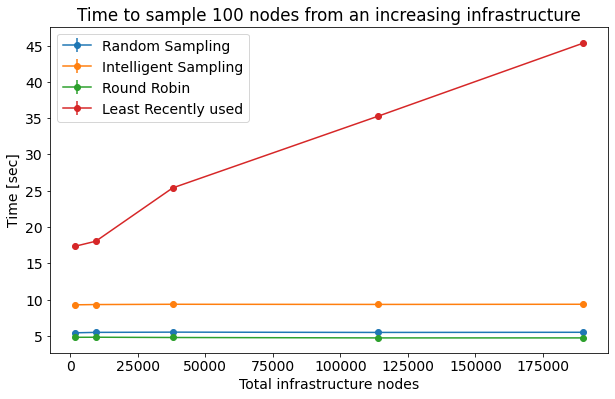

In [14]:
fig = plt.figure(figsize=[10,6])

y_is = results_i.loc[0:4, 'time_avg'].tolist()
y_is_err  = results_i.loc[0:4, 'time_std'].tolist()
x = results_i.loc[0:4, 'total nodes'].tolist()

y_rs = results_i.loc[5:9, 'time_avg'].tolist()
y_rs_err  = results_i.loc[5:9, 'time_std'].tolist()

y_rr = results_i.loc[10:14, 'time_avg'].tolist()
y_rr_err  = results_i.loc[10:14, 'time_std'].tolist()

y_lr = results_i.loc[15:19, 'time_avg'].tolist()
y_lr_err  = results_i.loc[15:19, 'time_std'].tolist()

# y_is_np = results_q.loc[0:3, 'time_np_avg'].tolist()
# y_is_np_err  = results_q.loc[0:3, 'acc_np_std'].tolist()

plt.title('Time to sample 100 nodes from an increasing infrastructure')

plt.errorbar(x, y_rs, yerr=y_rs_err, marker="o", label='Random Sampling')
plt.errorbar(x, y_is, yerr=y_is_err, marker="o", label='Intelligent Sampling')
# plt.errorbar(x, y_is_np, yerr=y_is_np_err, linestyle='dotted', label='Intelligent Sampling without profile')
plt.errorbar(x, y_rr, yerr=y_rr_err, marker="o", label='Round Robin')
plt.errorbar(x, y_lr, yerr=y_lr_err, marker="o", label='Least Recently used')

plt.xlabel('Total infrastructure nodes')
plt.ylabel('Time [sec]')

plt.legend(loc='upper left')

plt.savefig(fname='results/time_infra_v2.png', format='png')